In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
import pandas
import numpy
print (matplotlib.__version__)
print (pandas.__version__)
print (numpy.__version__)

1.5.3
0.18.1
1.11.1


In [3]:
#Reading ratings file:
df = pd.read_csv('/home/serge/Desktop/Kanye/Hubert/Memoir/data/data/data.csv')

In [4]:
n_users = df.UserId.unique().shape[0]
n_jobs = df.JobId.unique().shape[0]
print (' Total Number of users = ' + str(n_users) + ' | Total Number of jobs = ' + str(n_jobs) )
n_users

 Total Number of users = 2500 | Total Number of jobs = 150


2500

In [5]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df,test_size=0.25, random_state=0)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

# Create training and test matrix
R = np.zeros((n_users, n_jobs))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]  

T = np.zeros((n_users, n_jobs))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]



In [6]:
# Index matrix for training data
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

# Index matrix for test data
I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [7]:
# Stochastic Gradient Descent with Weighted Lambda Regularisation (SGD-WR)

In [8]:
# Predict the unknown ratings through the dot product of the latent features for users and items 

def prediction(P,Q):
    return np.dot(P.T,Q)



In [9]:
lmbda = 0.1 # Regularisation weight
k = 20  # Dimensionality of the latent feature space
m, n = R.shape  # Number of users and items
n_epochs = 100 # Number of epochs
gamma=0.01  # Learning rate

P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [10]:
# Calculate the RMSE
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [11]:
train_errors = []
test_errors = []

#Only consider non-zero matrix 
users,items = R.nonzero()      
for epoch in xrange(n_epochs):
    for u, i in zip(users,items):
        e = R[u, i] - prediction(P[:,u],Q[:,i])  # Calculate error for gradient
        P[:,u] += gamma * ( e * Q[:,i] - lmbda * P[:,u]) # Update latent user feature matrix
        Q[:,i] += gamma * ( e * P[:,u] - lmbda * Q[:,i])  # Update latent movie feature matrix
    train_rmse = rmse(I,R,Q,P) # Calculate root mean squared error from train dataset
    test_rmse = rmse(I2,T,Q,P) # Calculate root mean squared error from test dataset
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    print "[Epoch %d/%d] train error: %f, test error: %f" \
    %(epoch+1, n_epochs, train_rmse, test_rmse)
    
print "Algorithm converged"

[Epoch 1/100] train error: 1.715252, test error: 1.735454
[Epoch 2/100] train error: 1.607776, test error: 1.631400
[Epoch 3/100] train error: 1.525605, test error: 1.554489
[Epoch 4/100] train error: 1.458100, test error: 1.492760
[Epoch 5/100] train error: 1.407253, test error: 1.447407
[Epoch 6/100] train error: 1.370799, test error: 1.415786
[Epoch 7/100] train error: 1.344989, test error: 1.394147
[Epoch 8/100] train error: 1.326323, test error: 1.379175
[Epoch 9/100] train error: 1.312122, test error: 1.368405
[Epoch 10/100] train error: 1.300501, test error: 1.360119
[Epoch 11/100] train error: 1.290218, test error: 1.353206
[Epoch 12/100] train error: 1.280551, test error: 1.347063
[Epoch 13/100] train error: 1.271178, test error: 1.341476
[Epoch 14/100] train error: 1.262036, test error: 1.336457
[Epoch 15/100] train error: 1.253163, test error: 1.332091
[Epoch 16/100] train error: 1.244581, test error: 1.328424
[Epoch 17/100] train error: 1.236242, test error: 1.325421
[Epoch

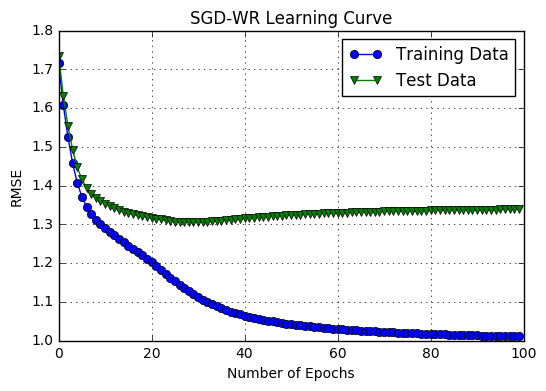

In [12]:
plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');
plt.plot(range(n_epochs), test_errors, marker='v', label='Test Data');
plt.title('SGD-WR Learning Curve')
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [13]:
# Calculate prediction matrix R_hat (low-rank approximation for R)
R = pd.DataFrame(R)
R_hat=pd.DataFrame(prediction(P,Q))


In [14]:
# Compare true ratings of user 27 with predictions
ratings = pd.DataFrame(data=R.loc[26,R.loc[26,:] > 0]).head(n=150)
ratings['Prediction'] = R_hat.loc[26,R.loc[26,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']
ratings

,Actual Rating,Predicted Rating
1,3.0,3.222578
10,4.0,3.462370
13,3.0,3.032039
15,5.0,3.100269
17,3.0,3.201146
18,3.0,2.937751
24,4.0,2.958567
25,1.0,2.442525
30,5.0,3.293484
31,2.0,3.283074


In [15]:
predictions = R_hat.loc[26,R.loc[26,:] == 0] # Predictions for jobs that the user 27 hasn't rated yet
top150 = predictions.sort_values(ascending=False).head(n=150)
recommendations = pd.DataFrame(data=top150)
recommendations.columns = ['Predicted Rating']

recommendations

,Predicted Rating
115,4.097835
38,4.095631
120,3.912690
113,3.892282
4,3.878876
122,3.764668
14,3.739649
19,3.714658
37,3.708918
55,3.697212


In [16]:
_1.to_csv('CF-SGD.csv')



NameError: name '_1' is not defined